<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/Profundidade_e_tem%2C_sali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# esse código tem como objetivo fazer os gráficos do relatório de bioqúimica usando os dados coletados no campo do dia 12/09/2024
```

# Relatório de bioquimica

## Criar um gráfico de linha como perfil de temperatura

In [ ]:
#!pip install netCDF4
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

Selecionar as variáveis do df

In [ ]:
fn = '/content/Dados de Campo.csv'
df = pd.read_csv(fn)

df.columns = df.iloc[0]
df = df[1:]

turbidez = pd.to_numeric(df['SECCHI'].str.replace(',', '.'), errors='coerce')
ze = turbidez*2.7
dze = pd.DataFrame({'ID': ID, 'ZE': ze})
dze = dze.dropna()
display(dze)

ID = df['ID']
p = pd.to_numeric(df['PROF(M)'].str.replace(',', '.'), errors='coerce')
s = pd.to_numeric(df['SAL.'].str.replace(',', '.'), errors='coerce')
t = pd.to_numeric(df['TEMP (°C)'].str.replace(',', '.'), errors='coerce')
data = pd.DataFrame({'ID': ID, 'p': p, 't': t, 's': s})
data.set_index('ID', inplace=True)

NameError: name 'pd' is not defined

Separar dados por ponto de coleta

In [ ]:
estacao = data.groupby('ID')
n1 = estacao.get_group('N1')
n2 = estacao.get_group('N2')
c1 = estacao.get_group('C1')
c2 = estacao.get_group('C2')
canal = estacao.get_group('CANAL')
n1 = n1.reset_index(drop=True)
n2 = n2.reset_index(drop=True)
c1 = c1.reset_index(drop=True)
c2 = c2.reset_index(drop=True)
canal = canal.reset_index(drop=True)


,ID,PROF(M),SECCHI,TEMP (°C),SAL.,OD (mgL),OD (%)
2,N1,"0,5",NaN,"21,3","21,6","7,85","98,9"
3,N1,1,NaN,"21,2","21,7","7,68","95,6"
4,N1,"1,5",NaN,"20,9","21,8","7,6","95,2"
5,N1,2,NaN,"20,8","21,8","7,79",97
6,N1,"2,5",NaN,"20,8","21,9","7,56","94,8"
7,N1,3,NaN,"20,7","21,9","7,44","90,3"
8,N1,"3,5",NaN,"20,8",22,"7,38","89,4"
9,N1,4,NaN,"20,8","22,1","7,06","89,1"
10,N2,0,"3,3","22,3","22,2","7,76","100,5"
11,N2,"0,5",NaN,"21,8","22,2","7,53","96,2"


 (temperatura X Profundidade)

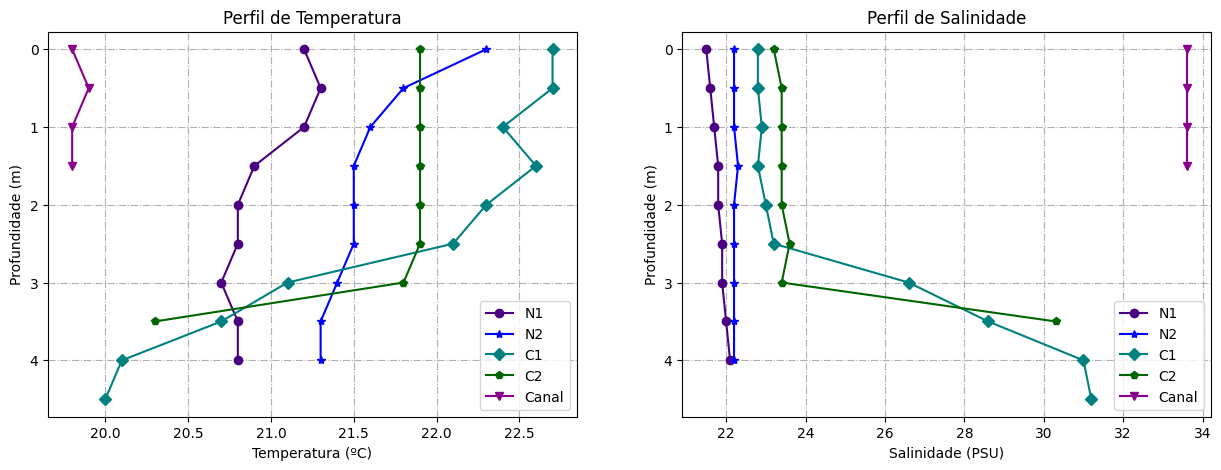

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_xlabel('Temperatura (ºC)')
ax1.set_ylabel('Profundidade (m)', color='k')
ax1.set_title('Perfil de Temperatura')

ax1.plot(n1['t'], n1['p'], color='indigo', marker='o', label='N1')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(linestyle='-.')
ax1.invert_yaxis()

ax1.plot(n2['t'], n2['p'], color='blue', marker='*', label='N2')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(linestyle='-.')
ax1.invert_yaxis()

ax1.plot(c1['t'], c1['p'], color='teal', marker='D', label='C1')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(linestyle='-.')
ax1.invert_yaxis()

ax1.plot(c2['t'], c2['p'], color='darkgreen', marker='p', label='C2')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(linestyle='-.')
ax1.invert_yaxis()

ax1.plot(canal['t'], canal['p'], color='darkmagenta', marker='v', label='Canal')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid(linestyle='-.')
ax1.invert_yaxis()
ax1.legend()

ax2.set_xlabel('Salinidade (PSU)')
ax2.set_ylabel('Profundidade (m)', color='k')
ax2.set_title('Perfil de Salinidade')

ax2.plot(n1['s'], n1['p'], color='indigo', marker='o', label='N1')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(linestyle='-.')
ax2.invert_yaxis()

ax2.plot(n2['s'], n2['p'], color='blue', marker='*', label='N2')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(linestyle='-.')
ax2.invert_yaxis()

ax2.plot(c1['s'], c1['p'], color='teal', marker='D', label='C1')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(linestyle='-.')
ax2.invert_yaxis()

ax2.plot(c2['s'], c2['p'], color='darkgreen', marker='p', label='C2')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(linestyle='-.')
ax2.invert_yaxis()

ax2.plot(canal['s'], canal['p'], color='darkmagenta', marker='v', label='Canal')
ax2.tick_params(axis='y', labelcolor='k')
ax2.grid(linestyle='-.')
ax2.invert_yaxis()

ax2.legend()
plt.show()

# Criar um heatmap de temperatura e salinidade

Construir um vetor de temperatura e salinidade 2D

In [ ]:
temp2 = pd.DataFrame({'N1': n1['t'], 'N2': n2['t'], 'C1': c1['t'], 'C2': c2['t'], 'Canal': canal['t'], 'Profundidade(m)': c1['p'] })
temp2.set_index('Profundidade(m)', inplace=True)

display(temp2)

sal2 = pd.DataFrame({'N1': n1['s'], 'N2': n2['s'], 'C1': c1['s'], 'C2': c2['s'], 'Canal': canal['s'], 'Profundidade(m)': c1['p'] })
sal2.set_index('Profundidade(m)', inplace=True)

display(sal2)

,N1,N2,C1,C2,Canal
Profundidade(m),,,,,
0.0,21.2,22.3,22.7,21.9,19.8
0.5,21.3,21.8,22.7,21.9,19.9
1.0,21.2,21.6,22.4,21.9,19.8
1.5,20.9,21.5,22.6,21.9,19.8
2.0,20.8,21.5,22.3,21.9,NaN
2.5,20.8,21.5,22.1,21.9,NaN
3.0,20.7,21.4,21.1,21.8,NaN
3.5,20.8,21.3,20.7,20.3,NaN
4.0,20.8,21.3,20.1,NaN,NaN


,N1,N2,C1,C2,Canal
Profundidade(m),,,,,
0.0,21.5,22.2,22.8,23.2,33.6
0.5,21.6,22.2,22.8,23.4,33.6
1.0,21.7,22.2,22.9,23.4,33.6
1.5,21.8,22.3,22.8,23.4,33.6
2.0,21.8,22.2,23.0,23.4,NaN
2.5,21.9,22.2,23.2,23.6,NaN
3.0,21.9,22.2,26.6,23.4,NaN
3.5,22.0,22.2,28.6,30.3,NaN
4.0,22.1,22.2,31.0,NaN,NaN


Plotar uma figura com dois heatmap (um representando temperatura e outro salinidade) usando pcolourmesh. Em um eixo secundário relacionar o limite da zona eufótica com um gráfico de linha para temperatura e salinidade

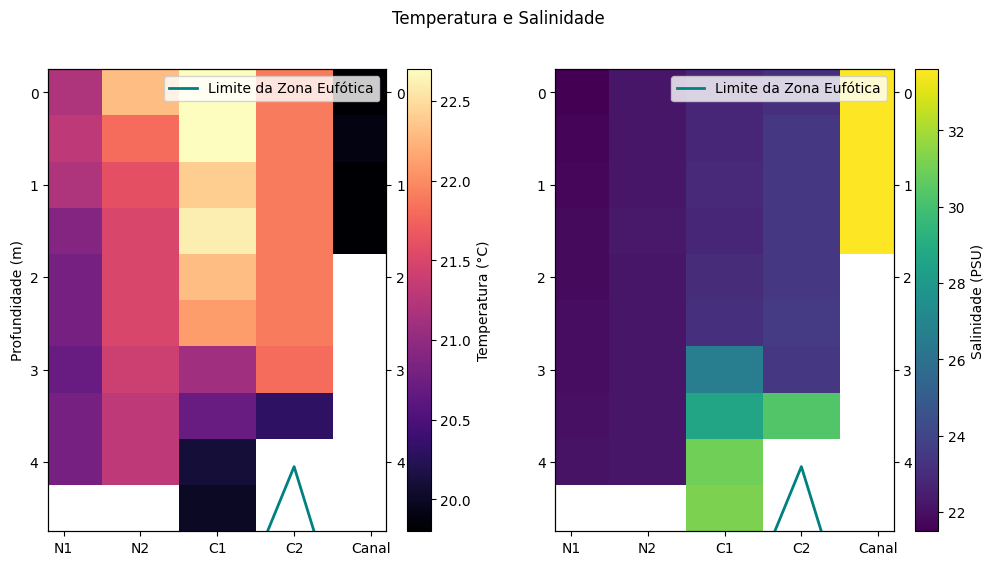

In [ ]:
x = temp2.columns
y = c1['p']
X, Y = np.meshgrid(np.arange(len(x)), y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

pca = ax1.pcolormesh(x, y, temp2.values, cmap='magma')
ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x)
c = plt.colorbar(pca, ax=ax1)
ax1.set_ylabel('Profundidade (m)')
c.set_label('Temperatura (°C)')

ax11 = ax1.twinx()
ax11.plot(dze['ID'], dze['ZE'], color='teal', label='Limite da Zona Eufótica', linewidth=2)
ax11.legend(loc='upper right')

ax11.set_ylim(ax1.get_ylim())
ax11.invert_yaxis()
ax1.invert_yaxis()

x1 = sal2.columns
y1 = c1['p']
X, Y = np.meshgrid(np.arange(len(x1)), y1)

pca = ax2.pcolormesh(x1, y1, sal2.values, cmap='viridis')
ax2.set_xticks(np.arange(len(x1)))
ax2.set_xticklabels(x1)
c = plt.colorbar(pca, ax=ax2)
ax1.set_ylabel('Profundidade (m)')
c.set_label('Salinidade (PSU)')

ax12 = ax2.twinx()
ax12.plot(dze['ID'], dze['ZE'], color='teal', label='Limite da Zona Eufótica', linewidth=2)
ax12.legend(loc='upper right')

ax12.set_ylim(ax1.get_ylim())
#ax12.invert_yaxis()
ax2.invert_yaxis()

fig.suptitle('Temperatura e Salinidade')
plt.show()

Criar um heat map usando a função do sns

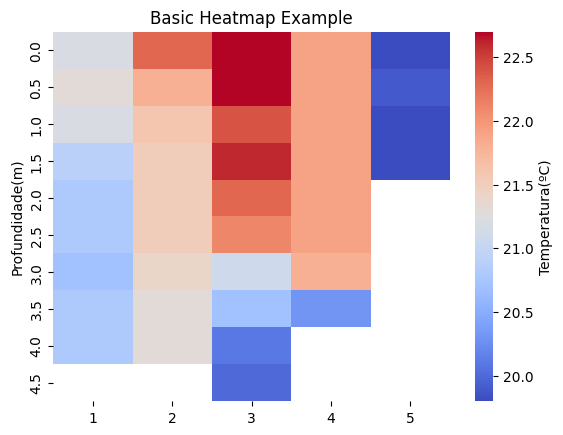

In [ ]:
sns.heatmap(temp2, cmap='coolwarm', cbar_kws={'label': 'Temperatura(ºC)'})
plt.title('intensidade da temperatura nos pontos de coleta')
plt.show()